Processing matrix1.txt...
Minimum size: 3
Time needed: 0.0015492439270019531


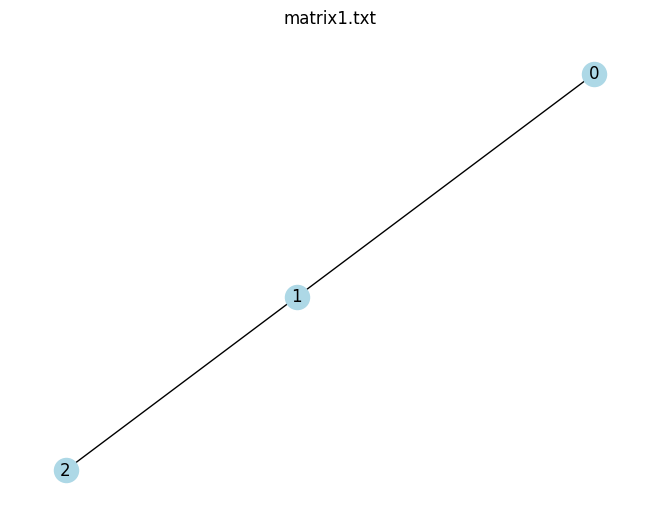

Processing matrix2.txt...
Minimum size: 6
Time needed: 0.001996755599975586


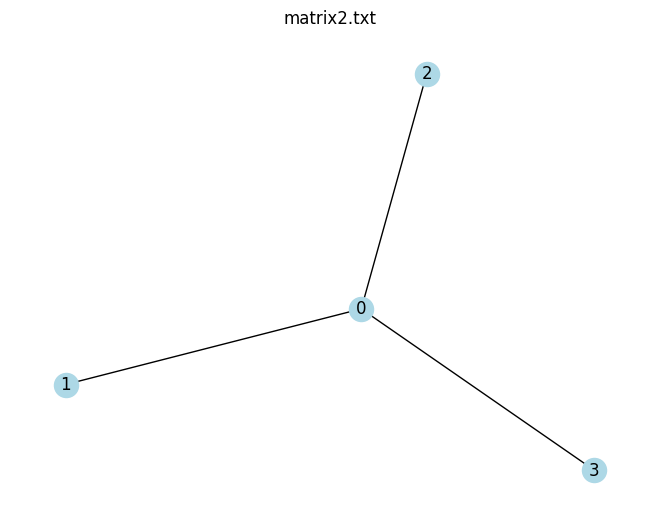

Processing matrix3.txt...
Minimum size: 6
Time needed: 0.013263225555419922


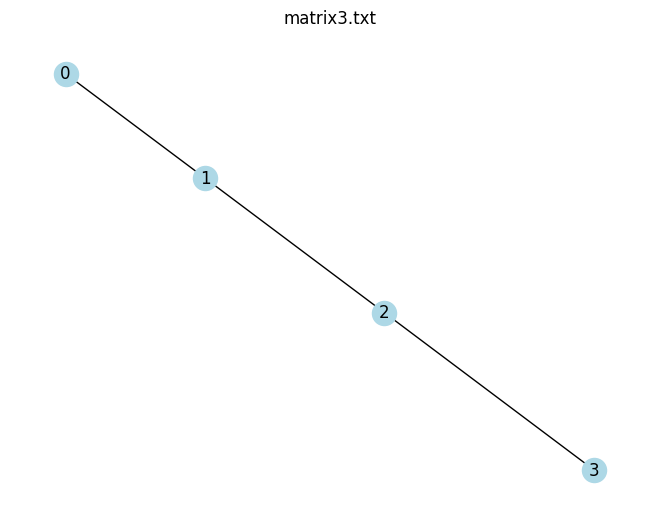

Processing matrix4.txt...
Minimum size: 4
Time needed: 0.022836685180664062


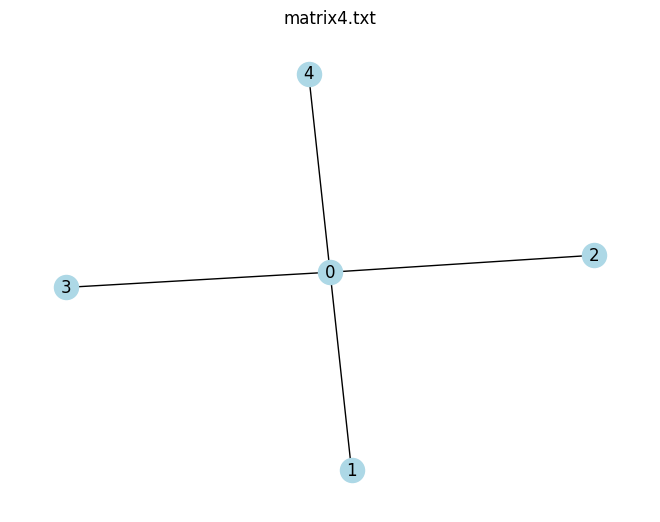

Processing matrix5.txt...
Minimum size: 40
Time needed: 0.0226593017578125


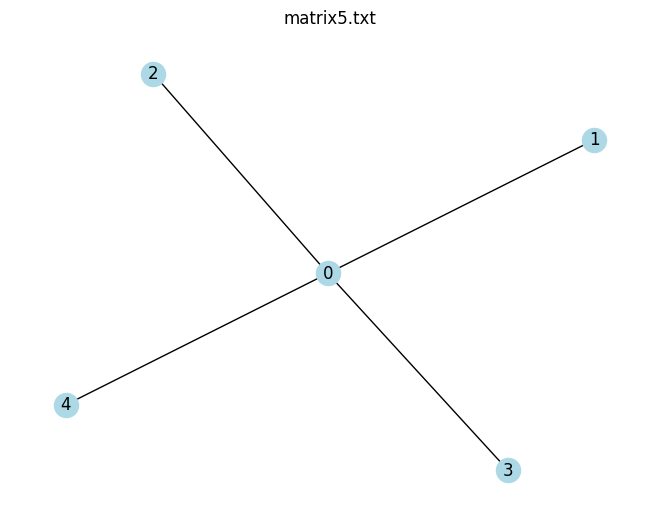

Processing matrix6.txt...
Minimum size: 10
Time needed: 0.01115870475769043


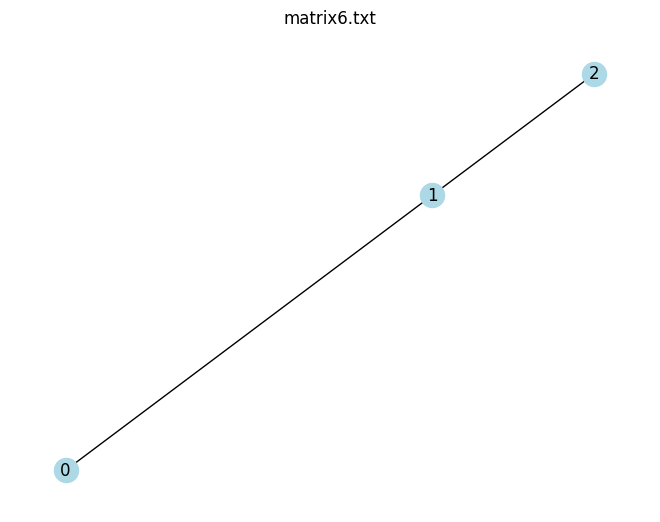

Processing matrix7.txt...
Minimum size: 4
Time needed: 0.011295080184936523


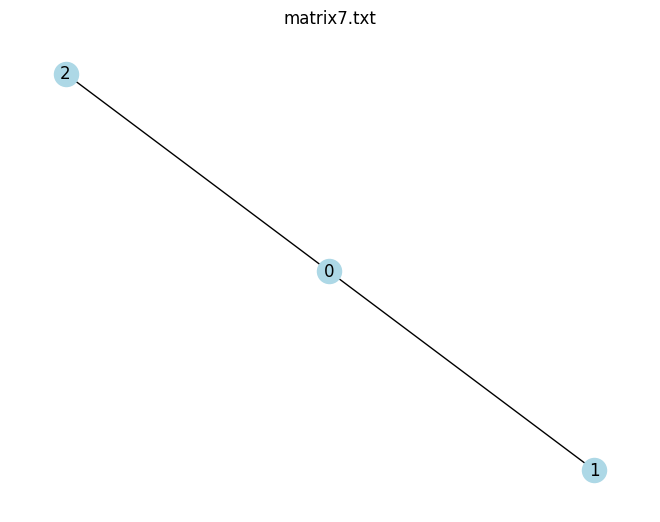

Processing matrix8.txt...
Minimum size: 65
Time needed: 0.02224588394165039


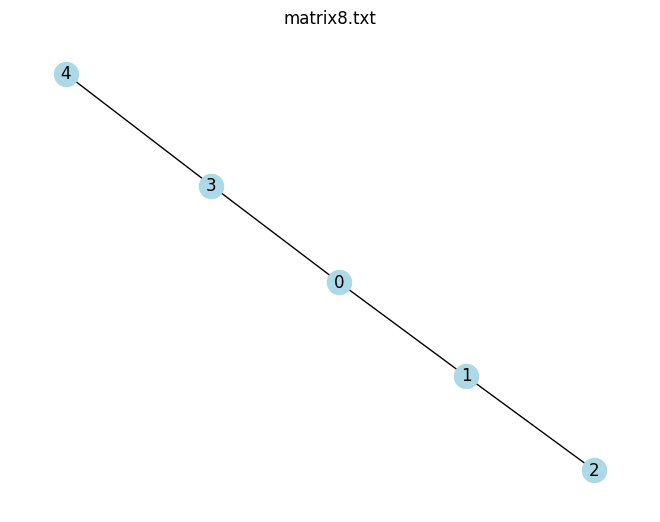

Processing mst1.txt...
Minimum size: 27
Time needed: 1463.0196132659912


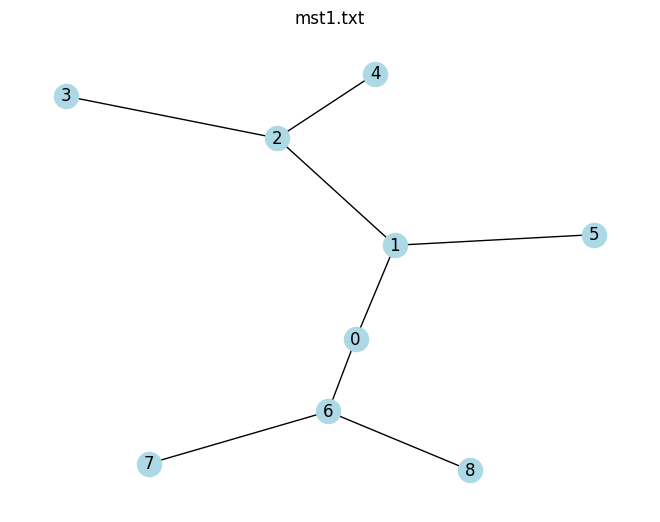

Processing mst2.txt...


In [ ]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import os
import time

def read_matrix_from_file(filename):
    matrix = []
    with open(filename, 'r') as file:
        for line in file:
            row = line.strip().replace('[', '').replace(']', '').split()
            matrix.append(list(map(int, row)))  
    return matrix
    
def generate_all_trees(n):
    nodes = range(n)
    for edges in itertools.combinations(itertools.combinations(nodes, 2), n-1):
        G = nx.Graph()
        G.add_nodes_from(nodes)
        G.add_edges_from(edges)
        if nx.is_tree(G):
            yield G

def assign_weights(G, M):
    
    for (u, v, d) in G.edges(data=True):
        G[u][v]['weight'] = max(M[u][v], M[v][u])

def tree_size(G):
    return sum(d['weight'] for (u, v, d) in G.edges(data=True))

def find_minimum_ultrametric_tree(M):
    n = len(M)
    min_size = float('inf')
    min_tree = None
    
    for tree in generate_all_trees(n):
        assign_weights(tree, M)
        size = tree_size(tree)
        if size < min_size:
            min_size = size
            min_tree = tree
            
    return min_tree, min_size

def process_all_matrices(directory):
    directory = os.path.abspath(directory)
    files = sorted([f for f in os.listdir(directory) if f.startswith('matrix') or f.startswith('mst') and f.endswith('.txt')])
    for filename in files:
        filepath = os.path.join(directory, filename)
        print(f"Processing {filename}...")

        start_time = time.time()        
        M = read_matrix_from_file(filepath)
        tree, size = find_minimum_ultrametric_tree(M)
        end_time = time.time()

        elapsed_time = end_time - start_time
        
       
        print("Minimum size:", size)
        print("Time needed:", elapsed_time)
        nx.draw(tree, with_labels=True, node_color='lightblue')
        plt.title(filename)
        plt.show()


process_all_matrices('../minimum-size-ultrametric-tree/tests')
